   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

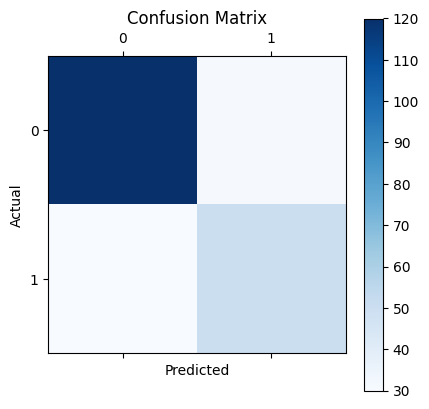

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)

# Step 2: Data Exploration
print(df.head())  # View the first few rows
print(df.describe())  # Statistical summary
print(df.isnull().sum())  # Check for missing values

# Step 3: Preprocessing
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize Confusion Matrix
plt.matshow(cm, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()


In [3]:
def Anderson_Darling_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0
    E_CDF = 0
    F_CDF = 0
    G_CDF = 0
    height = 0
    SD = 0
    power = 1

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        G_CDF = G_CDF + 1/n
        SD = (n * G_CDF * (1-G_CDF))**0.5
        height = abs(F_CDF - E_CDF)
        if XY_Sorted[ii+1] != XY_Sorted[ii]: 
            if SD>0: 
                Res = Res + (height/SD)**power

    AD_Dist = Res
    
    return AD_Dist

def  Anderson_Darling_Dist_PVal(XX, YY):
    # Information about Bootstrap Method: 
    # https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    AD = Anderson_Darling_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_AD = Anderson_Darling_Dist(comb[e],comb[f]);
        if (boost_AD > AD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, AD

In [5]:
# Cramer-Von Mises Distance
def CVM_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0;
    E_CDF = 0;
    F_CDF = 0;
    power = 1;

    for ii in range(0, n-2):
       E_CDF = E_CDF + X2_Sorted[ii]
       F_CDF = F_CDF + Y2_Sorted[ii]
       height = abs(F_CDF - E_CDF)
       if XY_Sorted[ii+1] != XY_Sorted[ii]: Res = Res + height**power

    CVM_Dist = Res
    
    return CVM_Dist

def  CVM_Dist_PVal(XX, YY):
    # Information about Bootstrap Method: 
    # https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    CVMD = CVM_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_CVM = CVM_Dist(comb[e],comb[f]);
        if (boost_CVM > CVMD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, CVMD

In [7]:
def Kolmogorov_Smirnov_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0;
    height = 0;
    E_CDF = 0;
    F_CDF = 0;
    power = 1;

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        if XY_Sorted[ii+1] != XY_Sorted[ii]: height = abs(F_CDF-E_CDF)
        if height > Res: Res = height

    KS_Dist = Res**power
    
    return KS_Dist
  
def  Kolmogorov_Smirnov_Dist_PVal(XX, YY):
    # Information about Bootstrap Method: 
    # https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    KSD = Kolmogorov_Smirnov_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_KSD = Kolmogorov_Smirnov_Dist(comb[e],comb[f]);
        if (boost_KSD > KSD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, KSD

In [11]:
def Kuiper_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    up = 0
    down = 0
    Res = 0
    E_CDF = 0
    F_CDF = 0
    height = 0
    power = 1

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        if XY_Sorted[ii+1] != XY_Sorted[ii]: height = F_CDF-E_CDF
        if height > up: up = height
        if height < down: down = height

    K_Dist = abs(down)**power + abs(up)**power
    
    return K_Dist

def  Kuiper_Dist_PVal(XX, YY):
    # Information about Bootstrap Method: 
    # https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    KD = Kuiper_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_KD = Kuiper_Dist(comb[e],comb[f]);
        if (boost_KD > KD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, KD

In [13]:
def Wasserstein_Dist(XX, YY)
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])
    
    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0
    E_CDF = 0
    F_CDF = 0
    power = 1

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        height = abs(F_CDF-E_CDF)
        width = XY_Sorted[ii+1] - XY_Sorted[ii]
        Res = Res + (height ** power) * width;  
 
    return Res

def  Wasserstein_Dist_PVal(XX, YY):
    # Information about Bootstrap Method: 
    # https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    WD = Wasserstein_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_WD = Wasserstein_Dist(comb[e],comb[f]);
        if (boost_WD > WD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, WD

In [ ]:
pVal, AD_statistic = Anderson_Darling_Dist_PVal(y_test, y_pred)

# Print the p-value and the Anderson-Darling statistic
print(f"Anderson-Darling Statistic: {AD_statistic:.4f}")
print(f"P-value: {pVal:.4f}")

# Interpretation:
if pVal < 0.05:
    print("The distributions of predicted and actual values are significantly different.")
else:
    print("The distributions of predicted and actual values are not significantly different.")
    
pVal, CVM_statistic = CVM_Dist_PVal(y_test, y_pred)

# Print the p-value and the Anderson-Darling statistic
print(f"Cramer von Mises Statistic: {CVM_statistic:.4f}")
print(f"P-value: {pVal:.4f}")

# Interpretation:
if pVal < 0.05:
    print("The distributions of predicted and actual values are significantly different.")
else:
    print("The distributions of predicted and actual values are not significantly different.")

pVal, KS_statistic = Kolmogorov_Smirnov_Dist_PVal(y_test, y_pred)

# Print the p-value and the Anderson-Darling statistic
print(f"Kolmogorov-Smirnov Statistic: {KS_statistic:.4f}")
print(f"P-value: {pVal:.4f}")

# Interpretation:
if pVal < 0.05:
    print("The distributions of predicted and actual values are significantly different.")
else:
    print("The distributions of predicted and actual values are not significantly different.")

pVal, Wasserstein_statistic = Wasserstein_Dist_PVal(y_test, y_pred)

# Print the p-value and the Anderson-Darling statistic
print(f"Wasserstein Statistic: {KS_statistic:.4f}")
print(f"P-value: {pVal:.4f}")

# Interpretation:
if pVal < 0.05:
    print("The distributions of predicted and actual values are significantly different.")
else:
    print("The distributions of predicted and actual values are not significantly different.")

pVal, Kuiper_statistic = Kuiper_Dist_PVal(y_test, y_pred)

# Print the p-value and the Anderson-Darling statistic
print(f"Kuiper Statistic: {KS_statistic:.4f}")
print(f"P-value: {pVal:.4f}")

# Interpretation:
if pVal < 0.05:
    print("The distributions of predicted and actual values are significantly different.")
else:
    print("The distributions of predicted and actual values are not significantly different.")

In [ ]:
# Safety Monitoring through Statistical Parametric Mapping
!pip install spm1d
import os
from matplotlib import pyplot
import spm1d

# Separating Wrong Responses of the CNN Classifier
X_test_wrong, y_test_wrong = X_test[np.where(y_test != y_pred)], y_test[np.where(y_test != y_pred)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 2 (just an example)
X_test_wrong3, y_test_wrong3 = X_test_wrong[np.where(y_test_wrong == 3)], y_test_wrong[np.where(y_test_wrong == 3)]

# print(X_test_wrong1.shape)

X_train3 = X_train[np.where(y_train[:,3] == 1)]


fig2, ax6 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax in enumerate(ax6.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    snpm    = spm1d.stats.nonparam.ttest2(xxx_2[:30], yyy_2[:30])
    snpmi   = snpm.inference(0.05, two_tailed=True, iterations=1000) # Alpha is considered as 0.05
    
   # print(xxx_2.shape)
    J,Q     = xxx_2.shape
    z       = snpmi.z
    zstar   = snpmi.zstar
    z0      = np.zeros(Q)
    z0      = z
    Z0      = np.reshape(z0, (30,30))
    Z0i     = Z0.copy()
    Z0i[np.abs(Z0i)<zstar] = 0
    ZZ      = np.hstack( [Z0, Z0i] )
    
    print(1 - z[z != 0].mean())
    
    c_ax.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax.axis('off')

fig3, ax7 = pyplot.subplots(1,3, figsize = (20,6))    

for ii, c_ax in enumerate(ax7.flatten()):
    c_ax.imshow(X_train3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, 3))
    c_ax.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong3[1]))
    c_ax.axis('off')